# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
import random

indices = [random.randrange(440) for i in range(3)]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5417,9933,10487,38,7572,1282
1,10362,9232,11009,737,3537,2342
2,29703,12051,16027,13135,182,2204


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

**Answer:**

1. Sample 0 represents a strong purchase tendancy in milk, grocery and detergents paper. This might be a representative spending in retailers.

2. Sample 1 shows a high purchse in fresh product. Therefore, this sample may represent cafes or restaurant business which serves services as fresh as possible.

3. Sample 1 show a lare spending trend in fresh and frozen products. Therefore, this sample also reprents cafes or restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis = 1)
new_label = data['Grocery']

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, new_label, test_size = 0.25, random_state=40)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 40).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("R^2 socre for {}: {}".format('Grocery', np.round(score, 2)))

R^2 socre for Grocery: 0.81


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

To answer this questions, it is better to calculate the coefficient of determination for each feature. For one feature with a lower or negative coefficient of determination, it does not really make sense to predict the variance of the feature based on other features. Therefore, finding the feature with the highest coefficient of determination helps us to predict the relation between other feature and dependant feature. Resulting coefficient of the determination is as follow:

| Feature | R^2 |
|---------|-----|
| Fresh | -0.33 |
| Milk | -0.2 |
| Grocery | 0.81 |
| Frozen | -0.22 |
| Detergents_Paper | 0.78 |
| Delicatessen | -3.36 |

According to the table above, grocery feature represents the highest R^2 score which indicates correlation fairely well between this feature and other features. Therefore, customers' spending pattern may be predictable with grocery feature using other dependant features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Users/dongkim/Documents/missionvirtual/pyprojects36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


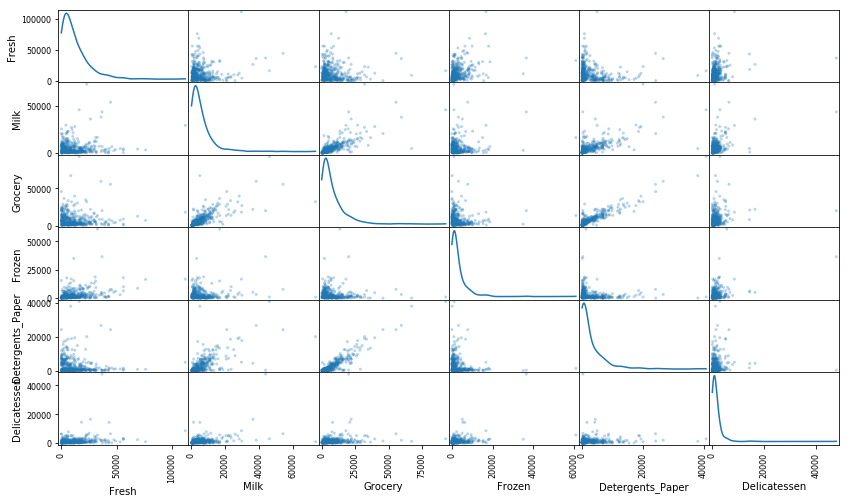

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

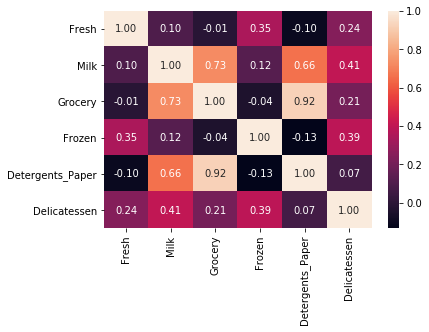

In [6]:
from seaborn import heatmap

heatmap(data.corr(), annot=True, fmt=".2f")

**Answer:**

 There seems to be some correlation between some feartures which can be observable in both scatter plot and heatmap above. In the scatter plot, there is a linear trend in pairs of grocery-detergents paper, grocery-milk which can be confirmed in heapmap with relatively high correlation coefficient. In addtion, there is a fair degree of correlation in detergenets paper and milk observed in both scatter plot and heapmap. 

 Based on heapmap and R^2 scores, we can determine that Grocery has some correlation with milk and detergents paper in establishing the profile of the data. Therefore, removing grocery category does not necessarily afftet to identiy customers' spending patten.
 
 Based on the scatter plot above, the data are not normally distributed but skewed to the left where most data lie.
Dateset being skewed indirectly shows that normalization is reuqired to get a better result. Especially, skewed dataset will negatively affect customer segments which clustering will produce in the end.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/Users/dongkim/Documents/missionvirtual/pyprojects36/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


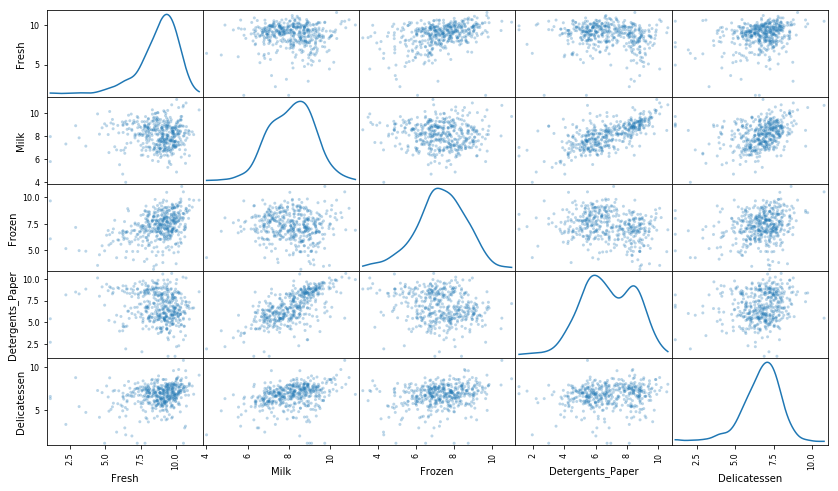

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(new_data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.drop(['Grocery'], axis=1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(samples)
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5417,9933,10487,38,7572,1282
1,10362,9232,11009,737,3537,2342
2,29703,12051,16027,13135,182,2204


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
0,8.597297,9.203618,3.637586,8.932213,7.156177
1,9.245901,9.130431,6.602588,8.171034,7.758761
2,10.299003,9.396903,9.483036,5.204007,7.698029


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
from scipy.stats import iqr

outliers = []
outliers_per_feature = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * iqr(log_data[feature])
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    print("Q1: {}, Q3: {}, step: {}".format(Q1, Q3, step))
    outlier_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers_per_feature.append(outlier_data.index.values)
    outliers += outlier_data.index.tolist()
    display(outlier_data)
    
# OPTIONAL: Select the indices for data points you wish to remove

display(outliers_per_feature)
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
display(good_data.shape)

Data points considered outliers for the feature 'Fresh':
Q1: 8.048058702214819, Q3: 9.73706394795268, step: 2.533507868606793


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,3.583519,10.095388,7.260523
66,2.197225,7.335634,5.164786,8.151333,3.295837
81,5.389072,9.163249,5.645447,8.964184,5.049856
95,1.098612,7.979339,6.086775,5.407172,6.563856
96,3.135494,7.869402,4.976734,8.262043,5.379897
128,4.941642,9.087834,4.955827,6.967909,1.098612
171,5.298317,10.160530,6.478510,9.079434,8.740337
193,5.192957,8.156223,6.865891,8.633731,6.501290
218,2.890372,8.923191,7.158514,8.475746,8.759669
304,5.081404,8.917311,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
Q1: 7.334981240042021, Q3: 8.880480088587671, step: 2.318248272818475


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.317488,1.945910,2.079442
356,10.029503,4.897840,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Frozen':
Q1: 6.609677749172153, Q3: 8.175896083178294, step: 2.3493275010092116


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,3.496508,8.847360,6.070738
57,8.597297,9.203618,3.637586,8.932213,7.156177
65,4.442651,9.950323,3.583519,10.095388,7.260523
145,10.000569,9.034080,3.737670,9.440738,8.396155
175,7.759187,8.967632,3.951244,8.341887,7.436617
264,6.978214,9.177714,4.110874,8.696176,7.142827
325,10.395650,9.728181,11.016479,7.148346,8.632128
420,8.402007,8.569026,3.218876,8.827321,7.239215
429,9.060331,7.467371,3.850148,4.430817,7.824446
439,7.932721,7.437206,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
Q1: 5.548101424791306, Q3: 8.274340598750195, step: 4.0893587609383335


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,8.390949,1.098612,6.882437
161,9.428190,6.291569,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
Q1: 6.011874656932535, Q3: 7.506728426547161, step: 2.2422806544219394


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,5.164786,8.151333,3.295837
109,7.248504,9.724899,6.511745,6.728629,1.098612
128,4.941642,9.087834,4.955827,6.967909,1.098612
137,8.034955,8.997147,6.493754,6.580639,3.583519
142,10.519646,8.875147,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.317488,1.945910,2.079442
183,10.514529,10.690808,10.505999,5.476464,10.777768
184,5.789960,6.822197,4.304065,5.811141,2.397895
187,7.798933,8.987447,8.743372,8.148735,1.098612
203,6.368187,6.529419,6.150603,6.860664,2.890372


[array([ 65,  66,  81,  95,  96, 128, 171, 193, 218, 304, 305, 338, 353,
        355, 357, 412]),
 array([ 86,  98, 154, 356]),
 array([ 38,  57,  65, 145, 175, 264, 325, 420, 429, 439]),
 array([ 75, 161]),
 array([ 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289,
        343])]

(398, 5)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* Are there any data points considered outliers for more than one feature based on the definition above?
-There are 5 data points which are duplicated between features; {65, 66, 75, 128, 154}

* Should these data points be removed from the dataset?
-They should be removed from the dataset because these data are not only outliers but also appear in multiple features.

* If any data points were added to the outliers list to be removed, explain why.
-Duplicated data points represents outliers in multiple features. Therefore, those duplicated are not representative of customer segments.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Index(['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicatessen'], dtype='object')

array([[ 0.142 , -0.4426,  0.1668, -0.8556, -0.1552],
       [ 0.5901,  0.1738,  0.6231,  0.0422,  0.4812],
       [-0.7411,  0.1535,  0.2537, -0.2522,  0.547 ],
       [ 0.2845,  0.1455, -0.7199, -0.269 ,  0.5544],
       [-0.0382, -0.8539, -0.0367,  0.3609,  0.3712]])

Total Variance from first 2 components: 0.7171
Total Variance from first 4 components: 0.9481


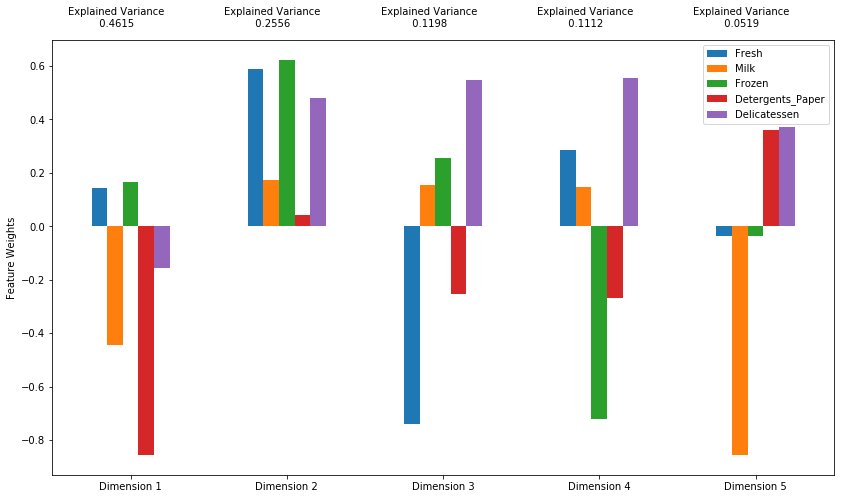

In [10]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns)).fit(good_data)
display(good_data.keys())
display(np.round(pca.components_, 4))
explained_var = np.round(pca.explained_variance_ratio_, 4)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

variance_by_two_components = sum([explained_var[i] for i in range(2)])
variance_by_four_components = sum([explained_var[i] for i in range(4)])
print("Total Variance from first 2 components: {}".format(np.round(variance_by_two_components, 4)))
print("Total Variance from first 4 components: {}".format(np.round(variance_by_four_components, 4)))

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

70% of the variance in the data is explained by the first and second principal components. On the other hand, 95.1% of the variance in the data is explained by the first four components.

High variance in Detergents_Paper and Milk is represented by the first principal component. The first principal component explains a high correlation between these two feature as was observed in scatter plot after data was being scaled. An increase in the first pricipal component is associated with a large spending of Detergents_Paper and Milk. This may be an indicator appearing in retail business.

The second principal component has a high variance in Milk, Frozen, and Delicatessen. An increase in the second principal component has an association to an increase in spending in Frozen, Milik and Delicatessen respectively. This type of spendingh patten is typical in a cafe or restaurant business.

The third principal component has a high variance in Fresh and Delicatessen. An increase in the third principal component has an association to corresponding increase in Fresh and Delicatessen. This type of customers' spending pattern can be observed in a cafe or restaurant business.

The fouth principal component represents a large variance in Frozen and Delicatessen. An increase in the fouth principal component has an association to a large spending in Frozen and Delicatessen. In a cafe or restaurant businesss, this type of customers' spending patten are typical.



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,-3.0494,-2.1114,-0.8932,2.4113,0.1334
1,-1.8725,0.3639,-0.1114,0.9896,0.0113
2,1.1876,2.6719,0.5947,0.0187,-1.4554


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.0494,-2.1114
1,-1.8725,0.3639
2,1.1876,2.6719


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

Setting up an arrow for Fresh
Setting up an arrow for Milk
Setting up an arrow for Frozen
Setting up an arrow for Detergents_Paper
Setting up an arrow for Delicatessen


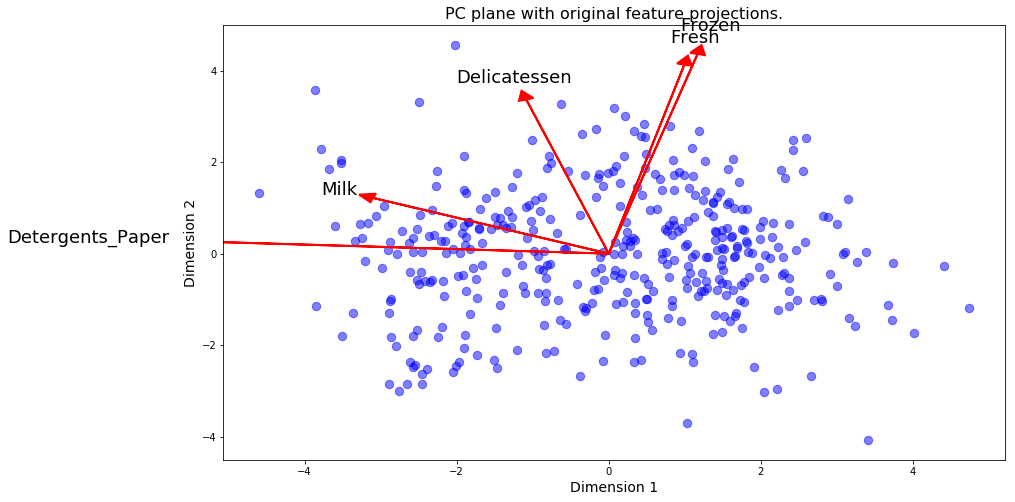

In [14]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

### Answer
From the biplot above, Detergents_Paper, Grocery and Milk are strongly correlated on the negative side for Dimension 1. Fresh, Frozen and Delicatessen are strongly correlated on the negative direction for Dimension 2.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

**What are the advantages to using a K-Means clustering algorithm?**

K-mean clustering algorithm works on a few assumption as follow:

1. Cluster size is balanced within the dataset.
2. The joint distribution of features within each cluster is spherical.
3. Clusters hava a similar density.

Under these assumption, the algorith works well when some assumption is broken and fast and efficient in terms of computational cost. K-mean algorithm is a special case of Gaussian Mixture Model(GMM) clustering algorithm, such that the probability of a data point to belong to a cluster is 1, and all other probabilities are 0 and the variance is 1. That is why K-mean produces only sperical clusters. In addtion, K-mean clustering converges on K clusters after a number of iterations. This clustring algorithm has been used in a broad range of applications in different field because of its reliability and its performance on data which is well defined and to be clear seperable.

**What are the advantages to using a Gaussian Mixture Model clustering algorithm?**

GMM performs well for a model having some hidden and not observable parameters. This is because GMM assigns a probability to each point to belong to certain cluster and it is able to incorporate covariance between data points into the model to identify more complex clusters. During the iterations, the probability assigned to each data point is revised. This results in making the algorithm more flexible when assigning a data point to a cluster and performs well over a less clear seperable dataset. Therefore, GMM produces a non-convex clusters, which can be controlled by the variance of the distribution.

**Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?**

From the plot drawn above, the data points seems to be mostly densily packed on an area of the plot but do not form clearly seperable clusters as certain points seem to be in the border bettween two or more segments. In addition to this, principal component analysis shows that there a strong correlation between features sucgh as Milk-Detergents_Paper and Fresh-Frozen-Delicatessen). Based on these observations, applying a Gausian Mixture Model might produce a better outcome for this problem.


**Reference**
1. https://www.quora.com/What-are-the-advantages-of-K-Means-clustering
2. https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

num_of_clusters = 2
# TODO: Apply your clustering algorithm of choice to the reduced data 
kmean_clusterer = KMeans(n_clusters=num_of_clusters, random_state=2).fit(reduced_data)
gmm_clusterer = GaussianMixture(n_components=num_of_clusters, random_state=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
kmean_preds = kmean_clusterer.predict(reduced_data)
gmm_preds = gmm_clusterer.predict(reduced_data)

# TODO: Find the cluster centers
kmean_centers = kmean_clusterer.cluster_centers_
gmm_centers = gmm_clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
kmean_sample_preds = kmean_clusterer.predict(pca_samples)
gmm_sample_preds = gmm_clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
kmean_score = silhouette_score(reduced_data, kmean_preds)
gmm_score = silhouette_score(reduced_data, gmm_preds)

print("Silhoutte score for K-mean with {} clusters: {}".format(num_of_clusters, np.round(kmean_score, 4)))
print("Silhoutte score for GMM with {} clusters: {}".format(num_of_clusters, np.round(gmm_score, 4)))

Silhoutte score for K-mean with 2 clusters: 0.4303
Silhoutte score for GMM with 2 clusters: 0.4294


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

**Report the silhouette score for several cluster numbers you tried.**

| # of clusters | Score(K-mean) | Score(GMM) |
| ------------- | ------------- | ---------- |
|      2        |   0.4303      |  0.4294    |
|      3        |   0.3676      |  0.3648    |
|      4        |   0.3377      |  0.3313    |
|      5        |   0.3625      |  0.3344    |
|      6        |   0.3569      |  0.312     |
|      7        |   0.3569      |  0.3252    |
|      8        |   0.3673      |  0.3434    |
|      9        |   0.357       |  0.3104    |
|     10        |   0.3447      |  0.322     |

**Of these, which number of clusters has the best silhouette score?**

Based on the table above, the best silhouette score is achieved by using 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

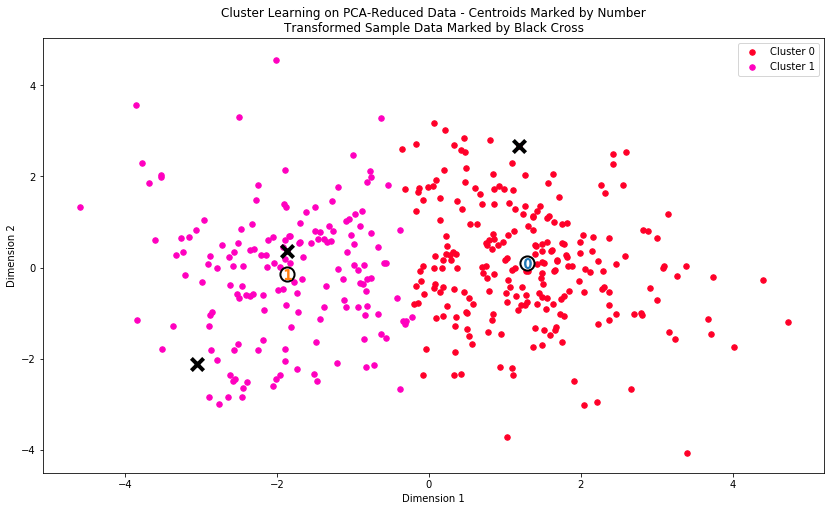

In [17]:
# Display the results of K-mean clustering algorithm
vs.cluster_results(reduced_data, kmean_preds, kmean_centers, pca_samples)

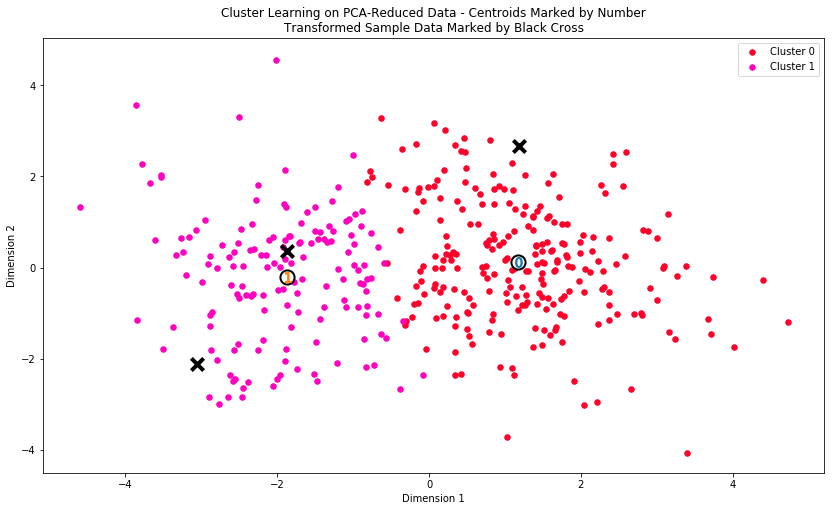

In [18]:
# Display the results of the GMM clustering algorithm
vs.cluster_results(reduced_data, gmm_preds, gmm_centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [19]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(gmm_centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(gmm_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = new_data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
Segment 0,9654.0,2048.0,2218.0,327.0,797.0
Segment 1,5159.0,7424.0,1087.0,4345.0,1089.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

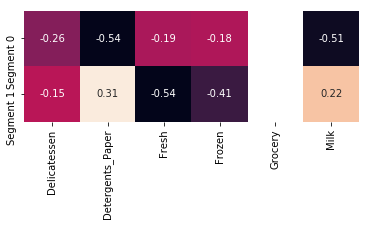

In [20]:
import seaborn as sns
sns.heatmap((true_centers-data.mean())/data.std(ddof=0),
            square=True, annot=True, cbar=False)

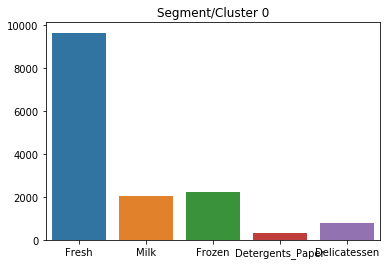

In [21]:
plt.figure()
plt.axes().set_title("Segment/Cluster 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

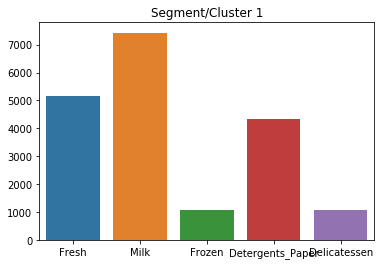

In [22]:
plt.figure()
plt.axes().set_title("Segment/Cluster 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)

**Answer:**

Mean value of the dataset is as follow:

| Fresh | Milk | Grocery | Frozen | Detergents_Paper |	Delicatessen |
|------|---------|---------|--------|------------------|--------------|
|12000.297727 |	5796.265909 | 7951.277273 |	3071.931818 | 2881.493182 | 1524.870455 |

For segment(cluster) 0, since custerms belonging to this cluster shows a strong spedning preference to fresh product, this tendancy is an indicative in a cafe or restaurant business. Even if the total spent in fresh product is below than the overall mean, a high purchase in fresh product is aligned with our observation in PCA analysis that customers in restaurant business would show this type of spending preference.

For segment(cluster) 1,  total cost spent in milk and detergents_paper is above the mean in the overall mean. In addtion to milk and detergents paper, there is a fairly strong preference to fresh product. This is an indicator which is commonly shown in customers making a bulk purchase ans keeping them in stock. This type of purchasing pattens is typical in customers in retailer or supermarker business.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [23]:
display(samples)

# Display the predictions
for i, pred in enumerate(gmm_sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5417,9933,10487,38,7572,1282
1,10362,9232,11009,737,3537,2342
2,29703,12051,16027,13135,182,2204


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

Based on sample points and spening pattenr of customers in cluster 0 and 1,  sample point 2 shows a strong purchase in fresh product which is aligned with the spending preference representative in cluster 0. On the other hand, sample 0 and 1 show a strong preferencer in milk and detergents paper which is spending tendancy in cluster 1.

Therefore, predictions for each sample point are consistent with customer segment observed from question 8.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Based on PCA analysis and clustering results, there are two groups of customers; customers(cluster 0) in a cafe or restaurant business or customers(cluster 1) in a retail or supermarket business.

Customers in cluster 0 whose business serves a lot of fresh products are reluctant to the change of delivery schedule from 5-day a week to 3-day a week. Because they want to provide their customer with products as fresh as possible.

Customers in cluster 1 whose business can keep a large inventory of products are not reluctant to a new delivery schedule. Customers in cluster 1 mainly serve milk and detergent papers whose quality can not be much affected in a strorage place by the change of delivery schedule from 5-day to 3-day a week.

Because customers belonging to differnt segments may respond differently, companines need to draw different hypothesis over different groups and run A/B tests. By taking subsamples from each segment, companies can evaluate the hypothesis specific to each segment seperately. These tests will help companies to make eduated decision of whether or not the change of delivery schedule is beneficial to both customers in each segment and companies.

Therfore, making use of the customer segments prevents companies from drawing a blind conclusion; all customer would be happy about a new delivery schecule. Strategically speaking, using customer segments will help companines to use targeted strategies to different customer segments and minimize groups of customers being affected by the change of delivery schedule. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

 To label the new customers using their estimated product spending and determine the most appropriate delivery service, a model using supervised learning classification algorithm such as decision tree can be trained with the initial customers' spending as inputs and customer segments as target variables. Once the classifier is trained, the trained classifier can be used to preduct customer segments for new customers. In the end, resulting customer segments for the new customers can be used to label the new customers and determine the most appropriate delivery service based on customer segment. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

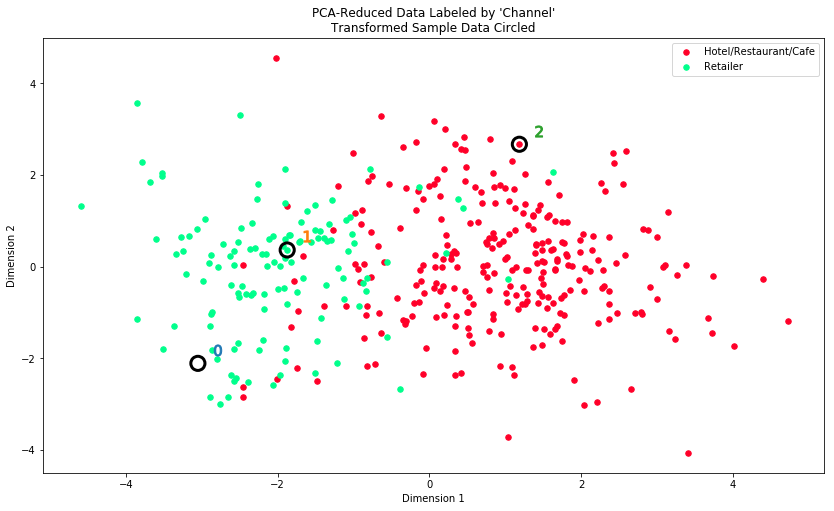

In [24]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

1. Resulting 2 clusters using GMM clustering algorithm is consistent with the underlying distribution of 2 clusters shown in plot above. Therefore, we can conclude that GMM algorithm clusters perform well.

2. Even if there is a region with two customer segments intermixed in the middle of the plot, there are customer segments on the most left and right respectively which are purely classified as retailers or cafes/restaurants.

3. Underlying structure of customer segments in initial cusomters' spending is consistent with previous observations where cluster 0 represents cafes or resturants and cluster 1 is for retailers.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.